In [1]:
import pandas as pd
from pandas import read_csv 
from datetime import datetime 
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA 
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv('shampoo.csv')

In [3]:
df = df.rename(columns = {'Sales of shampoo over a three year period':'Sales'})

In [33]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [4]:
df['Month'] = df.Month.apply(lambda x: "198"+x)
df.Month.head()

0    1981-01
1    1981-02
2    1981-03
3    1981-04
4    1981-05
Name: Month, dtype: object

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   37 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 720.0+ bytes


In [5]:
df.drop(36,axis = 0,inplace = True)
df.tail()


,Month,Sales
31,1983-08,407.6
32,1983-09,682.0
33,1983-10,475.3
34,1983-11,581.3
35,1983-12,646.9


In [6]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [40]:
df.head()

,Month,Sales
0,1981-01-01,266.0
1,1981-02-01,145.9
2,1981-03-01,183.1
3,1981-04-01,119.3
4,1981-05-01,180.3


In [7]:
df.set_index('Month',inplace=True)

###VISUALISE DATA

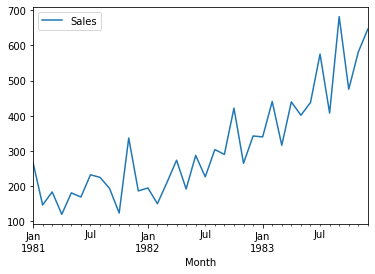

In [42]:
df.plot()

In [8]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [9]:
test_result=adfuller(df['Sales'])

In [10]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
adfuller_test(df['Sales'])

ADF Test Statistic : 3.060142083641182
p-value : 1.0
#Lags Used : 10
Number of Observations Used : 25
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### NOW WE CAN SAY THAT OUR DATA IS NOT STATIONARY SO WE WILL MAKE OUR DATA STATIONARY FIRST

### When we have seasonality in data so we will not take difference of just one month ,instead we will take diff of 12 month  but here we checked for 12 month shhift and for one month shift so we got good results with shift 1

In [12]:
import numpy as np

In [52]:
df['Sales']

Month
1981-01-01    266.0
1981-02-01    145.9
1981-03-01    183.1
1981-04-01    119.3
1981-05-01    180.3
1981-06-01    168.5
1981-07-01    231.8
1981-08-01    224.5
1981-09-01    192.8
1981-10-01    122.9
1981-11-01    336.5
1981-12-01    185.9
1982-01-01    194.3
1982-02-01    149.5
1982-03-01    210.1
1982-04-01    273.3
1982-05-01    191.4
1982-06-01    287.0
1982-07-01    226.0
1982-08-01    303.6
1982-09-01    289.9
1982-10-01    421.6
1982-11-01    264.5
1982-12-01    342.3
1983-01-01    339.7
1983-02-01    440.4
1983-03-01    315.9
1983-04-01    439.3
1983-05-01    401.3
1983-06-01    437.4
1983-07-01    575.5
1983-08-01    407.6
1983-09-01    682.0
1983-10-01    475.3
1983-11-01    581.3
1983-12-01    646.9
Name: Sales, dtype: float64

In [53]:
df['Sales'].shift(1)

Month
1981-01-01      NaN
1981-02-01    266.0
1981-03-01    145.9
1981-04-01    183.1
1981-05-01    119.3
1981-06-01    180.3
1981-07-01    168.5
1981-08-01    231.8
1981-09-01    224.5
1981-10-01    192.8
1981-11-01    122.9
1981-12-01    336.5
1982-01-01    185.9
1982-02-01    194.3
1982-03-01    149.5
1982-04-01    210.1
1982-05-01    273.3
1982-06-01    191.4
1982-07-01    287.0
1982-08-01    226.0
1982-09-01    303.6
1982-10-01    289.9
1982-11-01    421.6
1982-12-01    264.5
1983-01-01    342.3
1983-02-01    339.7
1983-03-01    440.4
1983-04-01    315.9
1983-05-01    439.3
1983-06-01    401.3
1983-07-01    437.4
1983-08-01    575.5
1983-09-01    407.6
1983-10-01    682.0
1983-11-01    475.3
1983-12-01    581.3
Name: Sales, dtype: float64

In [13]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(1)

In [29]:
#df['Seasonal First Difference1']=df['Seasonal First Difference']-df['Seasonal First Difference'].shift(1)

In [50]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.249074055553854
p-value : 1.7998574141687034e-10
#Lags Used : 1
Number of Observations Used : 33
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


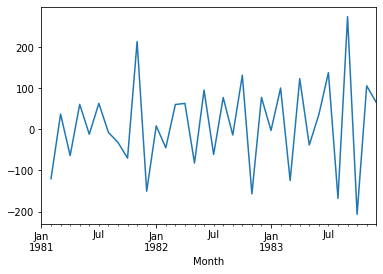

In [51]:
df['Seasonal First Difference'].plot()

### Auto Regressive Model ¶

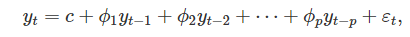

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

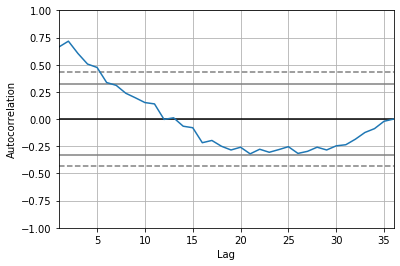

In [32]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

###Final Thoughts on Autocorrelation and Partial Autocorrelation.

Identification of an AR model is often best done with the PACF.
  
  For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory      the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial      autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.

Identification of an MA model is often best done with the ACF rather than the PACF.

  For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

p,d,q     
##p AR model lags(from pacf) periods taken for auto regressive model    
d differencing      , how many times differncin is done     
q MA lags periods taken for Movin Avrg Model

In [19]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

C:\Users\DEEPANKAR\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


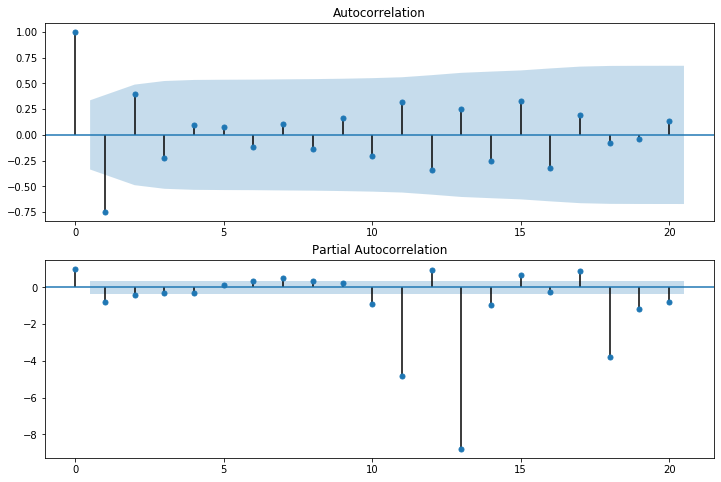

In [64]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[2:],lags = 20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[2:],lags = 20,ax=ax2)

In [21]:
# For non-seasonal data 
#p=0, d=1(ow many times we ave done difference), q=1
from statsmodels.tsa.arima_model import ARIMA

In [129]:

model=ARIMA(df['Sales'],order=(3,1,1))
model_fit=model.fit()


C:\Users\DEEPANKAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\DEEPANKAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [68]:
print(model_fit.aic)

406.13954439296333


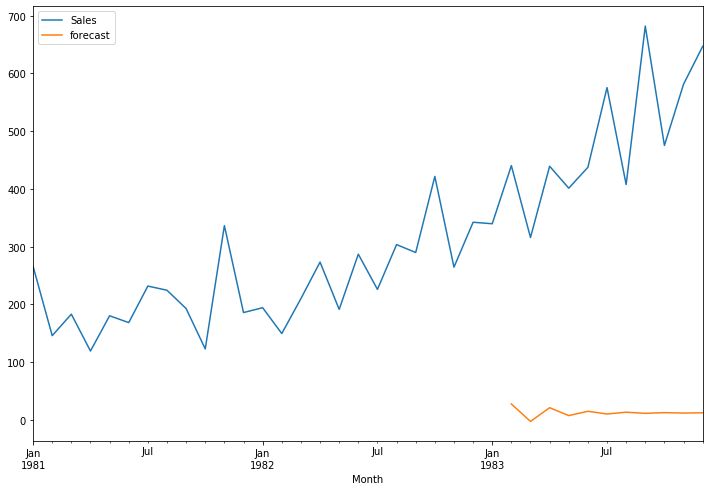

In [130]:
df['forecast']=model_fit.predict(start=25,end=35,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [ ]:
import statsmodels.api as sm

In [137]:

model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 0),seasonal_order=(1,1,0,20))
results=model.fit()

C:\Users\DEEPANKAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\DEEPANKAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\DEEPANKAR\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\DEEPANKAR\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


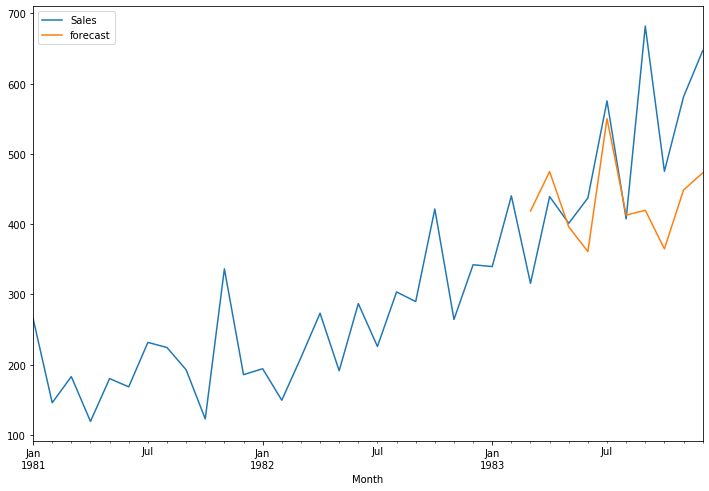

In [138]:
df['forecast']=results.predict(start=26,end=35,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [142]:
actual = df['Sales'].iloc[26:36]

In [143]:
predicted = df['forecast'].dropna()

In [144]:
mean_squared_error(actual,predicted)

14713.473174274575